In [1]:
import numpy as np
import matplotlib
%matplotlib nbagg

from matplotlib import pyplot as plt
from dstpy3 import *
from optictools import *
from time import time




def pmax(t0): 
	return np.abs(b2)/gamma / t0**2

b2 = -23e-27
gamma = 0.0037
t0 = 1e-12



fr=0.05
tvec=np.linspace(-10e-12,10e-12,2**10)
t0 = fr * 20e-12
p = pmax(t0)
feld = 3.2* np.sqrt(p) / np.cosh( tvec/t0) * np.exp( -1.0j * 2 * np.pi * .01e12 * tvec)
dt = tvec[2]-tvec[1]

dob = DSTObj(feld, tvec, b2, gamma)

zetas = np.linspace(0, 1.1 * dob.zetamax,111)
if False:
    #abalgos:
    plt.figure()
    for k in dob.calc_ab_methodsdict.keys():
        t1 = time()
        a,b = dob.calc_ab(1.0j * zetas, method = k)
        t2 = time()

        ts = k+" %.2f"%(t2-t1)
        #plt.title(dob.calc_ab_methodnamesdict[k]+" %.2f"%(t2-t1))
        plt.plot(zetas, np.log(1./np.abs(a)), label=ts)
    plt.legend(loc=0)

    plt.figure()
    for k in dob.calc_abdiff_methodsdict.keys():
        t1 = time()
        a,b,ad,bd = dob.calc_abdiff(1.0j * zetas, method = k)
        t2 = time()

        ts = k+" %.2f"%(t2-t1)
        #plt.title(dob.calc_ab_methodnamesdict[k]+" %.2f"%(t2-t1))
        plt.plot(zetas, np.log(1./np.abs(a)), label=ts)
    plt.legend(loc=0)


#
# check whether it can handle scalar zeta input
#

if False:
    print(" ---- calc_ab Methods ----")
    for k in dob.calc_ab_methodsdict.keys():

        a,b = dob.calc_ab(1.0j * zetas[10], method = k)
        a2,b2 = dob.calc_ab(1.0j * zetas[10:12], method = k)
        print("--")
        print(a)
        print(a2)       
    print(" ---- calc_abdiff Methods ----")
    for k in dob.calc_abdiff_methodsdict.keys():
        print(k, dob.calc_abdiff_methodnamesdict[k])
        a,b, ad, bd = dob.calc_abdiff(1.0j * zetas[10], method = k)
        a2,b2, ad2, bd2 = dob.calc_abdiff(1.0j * zetas[10:12], method = k)
        print("--")
        print(a)
        print(a2)       
    

False

0.00316227766017  * 0.0063095734448  * 0.0125892541179  * 0.0251188643151  * 0.0501187233627  * 0.1  * 0.199526231497  * 0.398107170553  * 

<IPython.core.display.Javascript object>


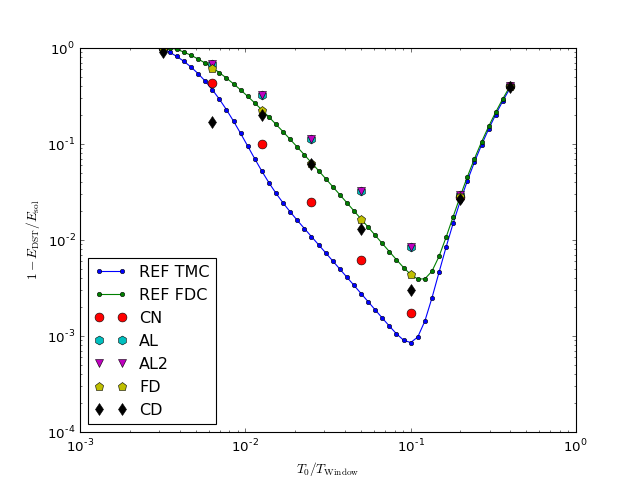

0.00316227766017  * 0.0063095734448  * 0.0125892541179  * 0.0251188643151  * 0.0501187233627  * 0.1  * 0.199526231497  * 0.398107170553  * 

<IPython.core.display.Javascript object>


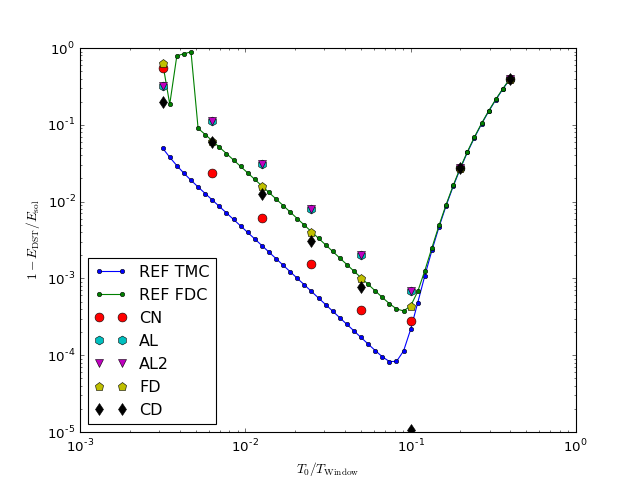

0.00316227766017  * 0.0063095734448  * 0.0125892541179  * 0.0251188643151  * 0.0501187233627  * 0.1  * 0.199526231497  * 0.398107170553  * 

<IPython.core.display.Javascript object>


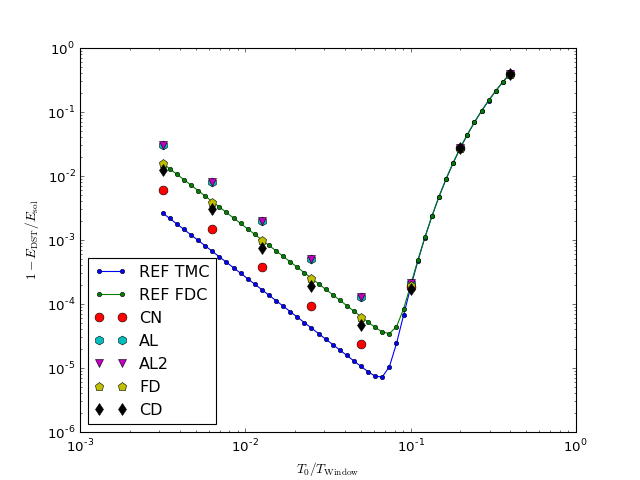

0.00316227766017  * 0.0063095734448  * 0.0125892541179  * 0.0251188643151  * 0.0501187233627  * 0.1  * 0.199526231497  * 0.398107170553  * 

<IPython.core.display.Javascript object>


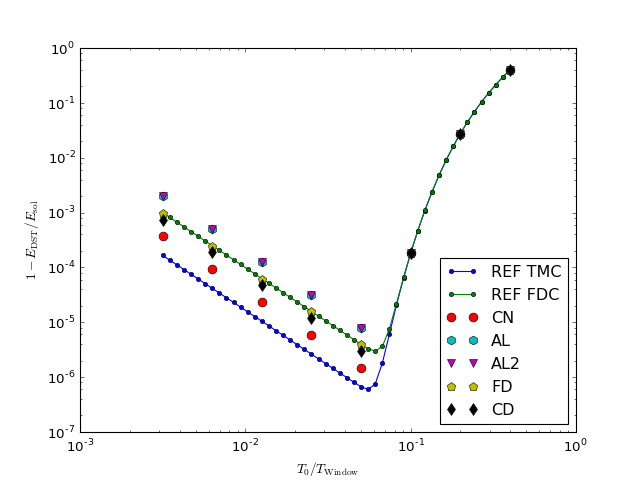

0.00316227766017  * 0.0063095734448  * 0.0125892541179  * 0.0251188643151  * 0.0501187233627  * 0.1  * 0.199526231497  * 0.398107170553  * 

<IPython.core.display.Javascript object>


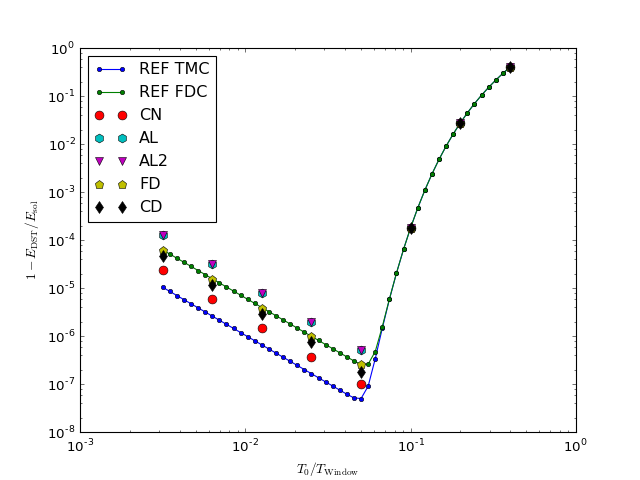

0.00316227766017  * 0.0063095734448  * 0.0125892541179  * 0.0251188643151  * 0.0501187233627  * 0.1  * 0.199526231497  * 0.398107170553  * 

<IPython.core.display.Javascript object>


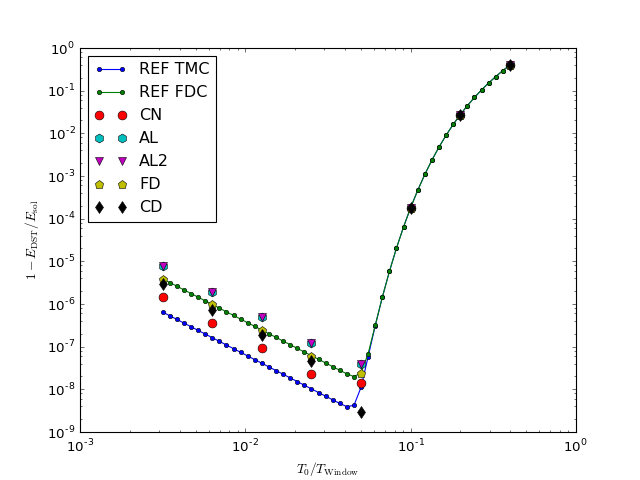

In [8]:
#
# check grid dependency
#

def pfloop3(do, inizetas, Meth, verbose=False, iterations=10):
	zetas = inizetas
	for i in range(iterations):
		aa,bb = do.calc_ab(1.0j*zetas, method=Meth)
		la = np.log(1./np.abs(aa)) 
		pl = pyfindpeaks(5,la,0)
		zpeak = zetas[pl[0]]
		zetas = np.linspace( (1-0.05**i)* zpeak, (1+0.05**i)*zpeak,len(inizetas))
		if verbose:
			if i==0:
				plt.figure()
				plt.plot(zetas,la)
				plt.plot(zetas[pl],la[pl],'o' )
			print("%d - %e	  la = %e"%(i, zpeak*4.0/do.energyfactor, la[pl[0]]))
	return zpeak
#
# ATTENTION: this literally can take HOURS
#
if F:
    from optictools import pyfindpeaks
    for NN in [6,8,10,12,14,16]:
        algos = ['CN','AL','AL2','FD','CD']    
        fracslo = 10**np.linspace(-2.5,-0.4,8)
        fracshi = 10**np.linspace(-2.5,-0.4,50)

        FRACM=[]
        FRACMTM = []
        for frac in fracslo:
            print(frac," * ",end="")
            tvec=np.linspace(-10e-12,10e-12,2**NN)
            t0 = frac * 20e-12
            p = pmax(t0)
            esol = 2 * t0 * p
            feld = 1.0* np.sqrt(p) / np.cosh( tvec/t0) #* np.exp( -1.0j * 2 * np.pi * .01e12 * tvec)
            dob = DSTObj( feld, tvec, b2, gamma)
            inizetas = np.linspace(1e-8,1.1 * dob.zetamax,50)
            ALGOM = [frac]
            for i in range(len(algos)):        
                zm = pfloop3(dob, inizetas, algos[i])
                ALGOM.append(1-zm*4.0/dob.energyfactor/esol)    
            FRACM.append(ALGOM)

        for frac in fracshi:
            tvec=np.linspace(-10e-12,10e-12,2**NN)
            t0 = frac * 20e-12
            p = pmax(t0)
            esol = 2 * t0 * p
            feld = 1.0* np.sqrt(p) / np.cosh( tvec/t0) #* np.exp( -1.0j * 2 * np.pi * .01e12 * tvec)
            dob = DSTObj( feld, tvec, b2, gamma)
            inizetas = np.linspace(1e-8,1.1 * dob.zetamax,50)
            zm = pfloop3(dob, inizetas,'TMC')
            zm2 = pfloop3(dob, inizetas,'FDC')
            FRACMTM.append([frac, np.abs (1-zm*4.0 / dob.energyfactor / esol),
                           np.abs (1-zm2*4.0 / dob.energyfactor / esol)])
        F=np.abs( np.array( FRACM))
        FRef = np.abs( np.array(FRACMTM))
        plt.figure()
        plt.loglog(FRef[:,0], FRef[:,1], 'o-', ms=4, label = "REF TMC")
        plt.loglog(FRef[:,0], FRef[:,2], 'o-', ms=4, label = "REF FDC")
        plt.loglog(F[:,0], F[:,1],'o', label = "CN", ms=8)
        plt.loglog(F[:,0], F[:,2],'h', label = "AL", ms=8)
        plt.loglog(F[:,0], F[:,3],'v', label = "AL2", ms=8)
        plt.loglog(F[:,0], F[:,4],'p', label = "FD", ms=8)
        plt.loglog(F[:,0], F[:,5],'d', label = "CD", ms=8)

        np.savetxt("testdata/algs%d.dat"%NN, F)
        np.savetxt("testdata/ref%d.dat"%NN, FRef)
        plt.xlabel(r"$T_0 / T_{\rm Window}$")
        plt.ylabel(r"$1 - E_{\rm DST}/E_{\rm sol}$")    
        plt.legend(loc=0)
        plt.savefig("testdata/%d.pdf"%NN)

[ 58 140]


<IPython.core.display.Javascript object>


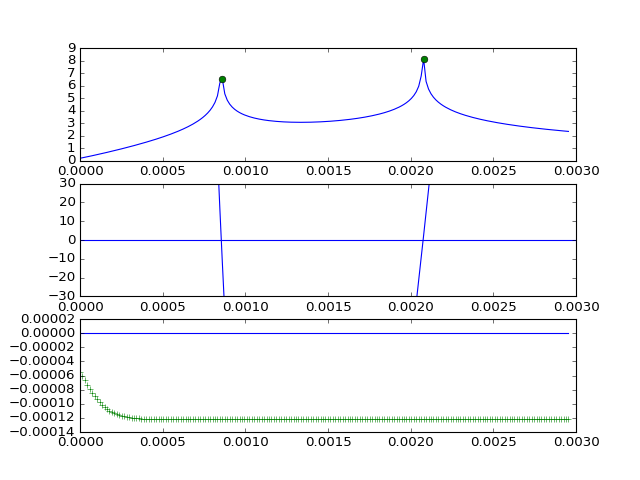

In [3]:
import numpy as np
import matplotlib
%matplotlib nbagg

from matplotlib import pyplot as plt
from dstpy3 import *
from optictools import *
from time import time

def pmax(t0): 
	return np.abs(b2)/gamma / t0**2

b2 = -23e-27
gamma = 0.0037
t0 = 1e-12



fr=0.05
tvec=np.linspace(-10e-12,10e-12,2**14)
t0 = fr * 20e-12
p = pmax(t0)
feld = 2.2* np.sqrt(p) / np.cosh( tvec/t0) #* np.exp( -1.0j * 2 * np.pi * .01e12 * tvec)
dt = tvec[2]-tvec[1]

dob = DSTObj(feld, tvec, b2, gamma)
zetas = np.linspace(0, dob.zetamax,200)
a,b,adiff,bdiff = dob.calc_abdiff(1.0j * zetas)
pl = pyfindpeaks(10,np.log(1./np.abs(a)),0)
print(pl)

plt.figure()
plt.subplot(311)
plt.plot( zetas, np.log(1./np.abs(a)))
plt.plot( zetas[pl], np.log(1./np.abs(a[pl])),'o')
plt.subplot(312)
plt.plot( zetas, np.imag(adiff))
plt.axhline(y=0)
plt.ylim([-30,30])
plt.subplot(313)
plt.plot(zetas, np.real(a/adiff))
plt.plot(zetas, np.imag(a/adiff),"+")

zs = 1.0j * zetas[70]

#plt.figure()
#plt.axhline(y=zetas[pl[0]])
#for i in range(100):
#    print("--- %d ---"%(i+1))
#    a,b,ad,bd = dob.calc_abdiff(zs)
#    print("zk", zs)
#    print("ak", a)
#    print("ad",ad)
#    print("a/ad", a/ad)
#    zs = zs -  a/ad
#    
#    plt.plot(np.real(zs), np.imag(zs),'o')
#    plt.text(np.real(zs), np.imag(zs),str(i))
    